In [47]:
from sklearn.model_selection import train_test_split
import string
exclude = set(string.punctuation)
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
"""
stop_lang = {}
stop_lang.update({"English": set(stopwords.words('english'))})
stop_lang.update({"Chinese": set(stopwords.words('chinese'))})
stop_lang.update({"Arabic": set(stopwords.words('arabic'))})
"""

'\nstop_lang = {}\nstop_lang.update({"English": set(stopwords.words(\'english\'))})\nstop_lang.update({"Chinese": set(stopwords.words(\'chinese\'))})\nstop_lang.update({"Arabic": set(stopwords.words(\'arabic\'))})\n'

## Load X and y (triggers first):

In [123]:
data_path = "../../../../3Datasets/ACE/Preprocessed/"

languages = ["English", "Chinese", "Arabic"]

X = {}
trig = {}
types = {}
for lang in languages:
    # Read X
    X.update({lang:[]})
    with open(data_path+lang+"/event_scope.txt") as infile:
        for line in infile:
            # VERY VERY BASIC Preprocessing to be improved
            line = ''.join(ch for ch in line if ch not in exclude)
            X[lang].append([word for word in line.strip('\n').lower().split(" ") if len(word)>=2 ])
    
    # Read triggers
    trig.update({lang:[]})
    with open(data_path+lang+"/event_trigger.txt") as infile:
        for line in infile:
            trig[lang].append(line.strip('\n'))
            
    # Read event types
    types.update({lang:[]})
    with open(data_path+lang+"/event_type.txt") as infile:
        for line in infile:
            types[lang].append(line.strip('\n'))

In [229]:
trig

{'English': ['be',
  'been',
  'Forum',
  'married',
  'drop',
  'call',
  'fax',
  'bought',
  'started',
  'terrorism',
  'bombings',
  'shooting',
  'shooting',
  'conflict',
  'extermination',
  'died',
  'married',
  'die',
  'die',
  'death',
  'bombed',
  'kill',
  'Demonstrations',
  'extermination',
  'contacted',
  'paid',
  'e-mails',
  'die',
  'call',
  'when',
  'used',
  'born',
  'message',
  'messages',
  'wedding',
  'suicide',
  'married',
  'marriage',
  'married',
  'enter',
  'ceremony',
  'ceremony',
  'ceremony',
  'ceremony',
  'took',
  'Divorce',
  'remarried',
  'divorce',
  'divorce',
  'married',
  'it',
  'marriage',
  'married',
  'going',
  'married',
  'remarriage',
  'wedding',
  'suit',
  'action',
  'suit',
  'receiving',
  'sued',
  'sued',
  'sued',
  'sued',
  'deductions',
  'assistance',
  'donation',
  'donations',
  'donation',
  'donated',
  'donations',
  'donations',
  'received',
  'donations',
  'donations',
  'locked up',
  'kills',
  '

### Data Statistics:

In [124]:
print(set(types["English"]))
print(len(set(types["English"])))

{'Life', 'Movement', 'Justice', 'Transaction', 'Personnel', 'Conflict', 'Business', 'Contact'}
8


In [125]:
print("Number of Sentence for English:", len(X["English"]))
print("Number of Sentence for Chinese:", len(X["Chinese"]))
print("Number of Sentence for Arabic:", len(X["Arabic"]))

Number of Sentence for English: 3341
Number of Sentence for Chinese: 2521
Number of Sentence for Arabic: 2267


In [126]:
import collections
c_english = collections.Counter(types["English"])
c_english

Counter({'Personnel': 331,
         'Contact': 228,
         'Life': 565,
         'Transaction': 182,
         'Business': 87,
         'Conflict': 947,
         'Movement': 517,
         'Justice': 484})

In [127]:
c_chinese = collections.Counter(types["Chinese"])
c_chinese

Counter({'Transaction': 135,
         'Justice': 412,
         'Business': 121,
         'Personnel': 200,
         'Movement': 633,
         'Life': 387,
         'Conflict': 413,
         'Contact': 220})

In [128]:
c_arabic = collections.Counter(types["Arabic"])
c_arabic

Counter({'Conflict': 548,
         'Movement': 435,
         'Contact': 273,
         'Life': 398,
         'Personnel': 152,
         'Justice': 379,
         'Transaction': 58,
         'Business': 24})

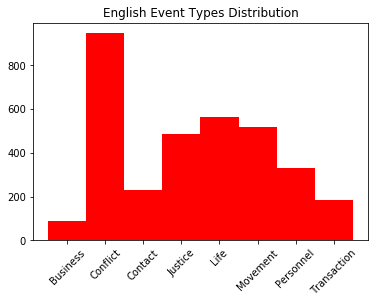

In [129]:
labels, values = zip(*Counter(sorted(types["English"])).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, color="red")
plt.xticks(indexes , labels, rotation=45)
plt.title("English Event Types Distribution")
plt.show()

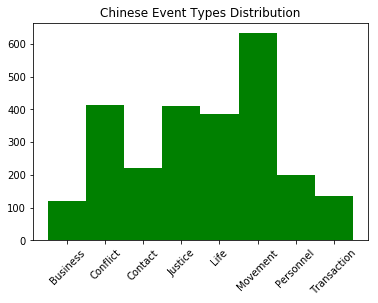

In [130]:
labels, values = zip(*Counter(sorted(types["Chinese"])).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, color="green")
plt.xticks(indexes, labels, rotation=45)
plt.title("Chinese Event Types Distribution")
plt.show()

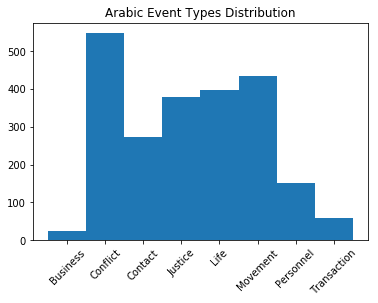

In [131]:
labels, values = zip(*Counter(sorted(types["Arabic"])).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes , labels, rotation=45)
plt.title("Arabic Event Types Distribution")
plt.show()

In [132]:
print(X["English"])

[['she', 'will', 'be', 'the', 'registration', 'manager', 'for', 'the', 'houston', 'center', 'accountable', 'for', 'causing', 'registrations', 'into', 'the', 'landmark', 'forum'], ['her', 'name', 'is', 'janine', 'beck', 'she', 'is', 'from', 'tucson', 'az', 'and', 'she', 'most', 'recently', 'has', 'been', 'the', 'team', 'leader', 'for', 'landmark', 'education', 'programs', 'in', 'tucson', 'the', 'title', 'is', 'source', 'person'], ['she', 'will', 'be', 'the', 'registration', 'manager', 'for', 'the', 'houston', 'center', 'accountable', 'for', 'causing', 'registrations', 'into', 'the', 'landmark', 'forum'], ['if', 'you', 'are', 'married', 'your', 'marriage', 'is', 'about', 'making', 'difference', 'in', 'the', 'world'], ['please', 'take', 'few', 'moments', 'to', 'drop', 'her', 'note', 'do', 'not', 'have', 'an', 'email', 'address', 'for', 'her'], ['it', 'will', 'have', 'to', 'be', 'snail', 'mail', 'give', 'her', 'call', 'at', 'the', 'center', 'or', 'send', 'her', 'fax', 'and', 'welcome', 'he

In [133]:
print(trig["English"])

['be', 'been', 'Forum', 'married', 'drop', 'call', 'fax', 'bought', 'started', 'terrorism', 'bombings', 'shooting', 'shooting', 'conflict', 'extermination', 'died', 'married', 'die', 'die', 'death', 'bombed', 'kill', 'Demonstrations', 'extermination', 'contacted', 'paid', 'e-mails', 'die', 'call', 'when', 'used', 'born', 'message', 'messages', 'wedding', 'suicide', 'married', 'marriage', 'married', 'enter', 'ceremony', 'ceremony', 'ceremony', 'ceremony', 'took', 'Divorce', 'remarried', 'divorce', 'divorce', 'married', 'it', 'marriage', 'married', 'going', 'married', 'remarriage', 'wedding', 'suit', 'action', 'suit', 'receiving', 'sued', 'sued', 'sued', 'sued', 'deductions', 'assistance', 'donation', 'donations', 'donation', 'donated', 'donations', 'donations', 'received', 'donations', 'donations', 'locked up', 'kills', 'charged', 'conviction', 'take', 'arrested', 'following', 'meeting', 'call', 'e-mail', 'meeting', 'head', 'come', 'come', 'Go', 'raised', 'parked', 'exited', 'childbirth

## Converting Words to IDs:

In [168]:
## Text words to ids Vocab
vocab_dict = {}
for lang in languages:
    for sent in X[lang]:
        for token in sent:
            if token in vocab_dict:
                vocab_dict[token] += 1
            else:
                vocab_dict[token] = 1
                
vocab_list = sorted(vocab_dict)
vocab = dict([x, y] for (y, x) in enumerate(vocab_list, start=1))
                
## Labels to ids Vocab
type_label_dict = {}
for lang in languages:
    for type_ in types[lang]:
        if type_ in vocab_dict:
            type_label_dict[type_] += 1
        else:
            type_label_dict[type_] = 1
            
vocab_label_list = sorted(type_label_dict)
vocab_label = dict([x, y] for (y, x) in enumerate(vocab_label_list, start=0))
            
print(vocab_label)

{'Business': 0, 'Conflict': 1, 'Contact': 2, 'Justice': 3, 'Life': 4, 'Movement': 5, 'Personnel': 6, 'Transaction': 7}


In [169]:
print(len(vocab_label))
print(len(vocab))

8
25338


In [170]:
types[lang]

['Conflict',
 'Movement',
 'Contact',
 'Life',
 'Contact',
 'Contact',
 'Life',
 'Contact',
 'Life',
 'Contact',
 'Contact',
 'Contact',
 'Contact',
 'Contact',
 'Contact',
 'Movement',
 'Movement',
 'Conflict',
 'Life',
 'Life',
 'Movement',
 'Movement',
 'Movement',
 'Movement',
 'Conflict',
 'Movement',
 'Life',
 'Life',
 'Life',
 'Movement',
 'Life',
 'Life',
 'Conflict',
 'Life',
 'Life',
 'Life',
 'Life',
 'Movement',
 'Conflict',
 'Movement',
 'Conflict',
 'Life',
 'Life',
 'Life',
 'Life',
 'Life',
 'Movement',
 'Conflict',
 'Conflict',
 'Conflict',
 'Conflict',
 'Personnel',
 'Conflict',
 'Contact',
 'Personnel',
 'Contact',
 'Contact',
 'Contact',
 'Contact',
 'Movement',
 'Personnel',
 'Personnel',
 'Personnel',
 'Contact',
 'Personnel',
 'Personnel',
 'Justice',
 'Justice',
 'Life',
 'Justice',
 'Movement',
 'Movement',
 'Movement',
 'Movement',
 'Movement',
 'Movement',
 'Movement',
 'Contact',
 'Conflict',
 'Contact',
 'Justice',
 'Contact',
 'Life',
 'Life',
 'Conflict',

In [171]:
X_ids = {}
event_types_ids = {}

for lang in languages:
    X_sent = []
    for sent in X[lang]:
        X_words = []
        for word in sent:
            X_words.append(vocab[word])
        X_sent.append(X_words)
    X_ids.update({lang: X_sent})
    
    types_event = []
    for type_ in types[lang]:
        types_event.append(vocab_label[type_])
        
    event_types_ids.update({lang:types_event})

## I. Split into Train, Dev and Test: TO BE REPLACED BY CROSS VALIDATION:

In [172]:
X_ids

{'English': [[6621,
   8020,
   1106,
   7347,
   6066,
   4558,
   3109,
   7347,
   3684,
   1550,
   485,
   3109,
   1534,
   6067,
   3932,
   7347,
   4259,
   3142],
  [3560,
   4925,
   3980,
   4024,
   1120,
   6621,
   3980,
   3191,
   7588,
   1007,
   723,
   6621,
   4854,
   6001,
   3498,
   1127,
   7347,
   7269,
   4311,
   3109,
   4259,
   2584,
   5766,
   3777,
   7588,
   7347,
   7447,
   3980,
   6842,
   5449],
  [6621,
   8020,
   1106,
   7347,
   6066,
   4558,
   3109,
   7347,
   3684,
   1550,
   485,
   3109,
   1534,
   6067,
   3932,
   7347,
   4259,
   3142],
  [3733, 8152, 842, 4607, 8161, 4605, 3980, 462, 4542, 2342, 3777, 7347, 8086],
  [5548,
   7231,
   2983,
   4825,
   7449,
   2523,
   3560,
   5077,
   2450,
   5075,
   3508,
   713,
   2627,
   525,
   3109,
   3560],
  [4000,
   8020,
   3508,
   7449,
   1106,
   6782,
   4526,
   3286,
   3560,
   1438,
   931,
   7347,
   1550,
   5213,
   6537,
   3560,
   2946,
   723,
   7965,
   

In [173]:
TEST_PERC = 0.4
SHUFFLE_SEED = 100099540

X_train = {}
X_dev = {} 
X_test = {} 
y_train = {}
y_dev = {}
y_test = {}

for lang in languages:
    X_train.update({lang:[]})
    X_dev.update({lang:[]}) 
    X_test.update({lang:[]})
    y_train.update({lang:[]})
    y_dev.update({lang:[]})
    y_test.update({lang:[]})

    X_train[lang], X_dev_test, y_train[lang], y_dev_test = train_test_split(X_ids[lang], event_types_ids[lang], test_size=TEST_PERC, random_state=SHUFFLE_SEED)
    X_dev[lang], X_test[lang], y_dev[lang], y_test[lang] = train_test_split(X_dev_test, y_dev_test, test_size=TEST_PERC, random_state=SHUFFLE_SEED)

### Padding to MAX_SEQUENCE:

In [174]:
MAX_SEQUENCE_LENGTH  = 0 
for lang in languages:
    for sent in X[lang]:
        if len(sent) > MAX_SEQUENCE_LENGTH:
            print(sent)
            MAX_SEQUENCE_LENGTH = len(sent)

['she', 'will', 'be', 'the', 'registration', 'manager', 'for', 'the', 'houston', 'center', 'accountable', 'for', 'causing', 'registrations', 'into', 'the', 'landmark', 'forum']
['her', 'name', 'is', 'janine', 'beck', 'she', 'is', 'from', 'tucson', 'az', 'and', 'she', 'most', 'recently', 'has', 'been', 'the', 'team', 'leader', 'for', 'landmark', 'education', 'programs', 'in', 'tucson', 'the', 'title', 'is', 'source', 'person']
['when', 'had', 'job', 'ran', 'software', 'company', 'for', 'few', 'years', 'and', 'then', 'started', 'my', 'own', 'company', 'pinnacle', 'business', 'enterprises', 'and', 'was', 'under', 'year', 'exclusive', 'contract', 'with', 'pricewaterhouosecoopers', 'doing', 'lot', 'of', 'interesting', 'things', 'like', 'business', 'process', 'engineering', 'processes', 'but', 'mostly', 'people', 'and', 'the', 'effect', 'new', 'process', 'would', 'have', 'on', 'them']
['especially', 'for', 'those', 'of', 'us', 'who', 'still', 'have', 'so', 'many', 'years', 'if', 'one', 'year

In [175]:
MAX_SEQUENCE_LENGTH

132

In [176]:
x_train_dict = {}
x_dev_dict = {}
x_test_dict = {}
for lang in languages:
    data_train = pad_sequences(X_train[lang], padding='post', maxlen=MAX_SEQUENCE_LENGTH)
    data_dev = pad_sequences(X_dev[lang], padding='post', maxlen=MAX_SEQUENCE_LENGTH)
    data_test = pad_sequences(X_test[lang], padding='post', maxlen=MAX_SEQUENCE_LENGTH)

    x_train_dict.update({lang: data_train})
    x_dev_dict.update({lang: data_dev})
    x_test_dict.update({lang: data_test})

### Converting Labels to One-hot:

In [180]:
from keras.utils import to_categorical

n_classes = len(vocab_label)
one_hot_train = {}
one_hot_dev = {}
one_hot_test = {}

for lang in languages:
    one_hot_train.update({lang: to_categorical(y_train[lang], num_classes=n_classes)})
    one_hot_dev.update({lang: to_categorical(y_dev[lang], num_classes=n_classes)})
    one_hot_test.update({lang: to_categorical(y_test[lang], num_classes=n_classes)})
    

## II. Train NN Model Monolingually: trying with randomnly initialized embeddings:

In [194]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Embedding, Input, Dense, AveragePooling1D, Dropout, average, Flatten
from keras.preprocessing.sequence import pad_sequences

#from hyperas.distributions import choice, uniform, conditional


class MLPModel(object):

    def __init__(self, embed_dim, max_sequences, dense, dropout, learning_rate, beta_1, beta_2, epsilon,
                 n_classes, word_index):
        sequence_input = Input(shape=(max_sequences,), dtype='int32')
        print(len(word_index)+1)
        embedding_layer = Embedding(len(word_index)+1, embed_dim, input_length=max_sequences, trainable=False, mask_zero=False)(sequence_input)
                                    #weights=[embedding_matrix]

        average_emb = AveragePooling1D(pool_size=max_sequences)(embedding_layer)

        #dense_layer = Dense(({{choice([256, 512, 1024])}}), input_shape=(embed_dim,), activation={{choice(['relu', 'sigmoid'])}})(average_emb)  # 512, "relu"

        #dense_layer = Dense(({{choice([256, 512, 1024])}}), input_shape=(embed_dim,), activation="relu")(average_emb)
        dense_layer = Dense(512, input_shape=(embed_dim,), activation="relu")(average_emb)

        #dropout_layer = Dropout(dropout)(dense_layer)

        flat = Flatten()(dense_layer)

        softmax_layer = Dense(n_classes, activation='softmax')(flat)

        model = Model(input=sequence_input, output=softmax_layer)

        adam = Adam(lr=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
        #sgd = SGD(lr=learning_rate, decay=0, momentum=0.9, nesterov=True)

        model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["accuracy"])

        self.model = model

In [204]:
embed_dim = 300
max_sequences = MAX_SEQUENCE_LENGTH  
dense = 512
dropout = 0.3
learning_rate = 1e-3
beta_1 = 0.7
beta_2 = 0.999
epsilon = 1e-08
mlp_model = MLPModel(embed_dim, max_sequences, dense, dropout, learning_rate, beta_1, beta_2, epsilon, len(vocab_label), vocab)


25339


/Users/d22admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [205]:
# -*- coding: utf-8 -*-
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


def tp_fp_fn(y_pred, y_true, n_classes):
    tp_dict = {}
    fp_dict = {}
    fn_dict = {}
    for class_n in range(1,len(n_classes)+1):
        tp = 0
        fp = 0
        fn = 0
        for i in range(0, len(y_true)):
            if y_true[i] == class_n and y_pred[i] == class_n:# True Positive
                tp = tp + 1
            if y_true[i] != class_n and y_pred[i] == class_n:# True Negative
                fp = fp + 1
            if y_true[i] == class_n and y_pred[i] != class_n:# False Negative
                fn = fn + 1
        tp_dict.update({class_n: tp})
        fp_dict.update({class_n: fp})
        fn_dict.update({class_n: fn})
    return tp_dict, fp_dict, fn_dict


def micro_precision(tp_dict, fp_dict, n_classes):
    mi_prec_num = 0
    mi_prec_deno = 0
    for class_n in range(1, len(n_classes)+1):
        mi_prec_num += tp_dict[class_n]
        mi_prec_deno += tp_dict[class_n] + fp_dict[class_n]

    return mi_prec_num/mi_prec_deno


def micro_recall(tp_dict, fn_dict, n_classes):
    mi_recall_num = 0
    mi_recall_deno = 0
    for class_n in range(1, len(n_classes)+1):
        mi_recall_num += tp_dict[class_n]
        mi_recall_deno += tp_dict[class_n] + fn_dict[class_n]

    return mi_recall_num/mi_recall_deno


def f1_score_mean(precision, recall):
    if precision * recall != 0:
        harm_mean = 2 * (precision*recall)/(precision+recall)
    else:
        harm_mean = 0
    return harm_mean


def macro_precision(tp_dict, fp_dict, n_classes):
    ma_prec = 0
    for class_n in range(1, len(n_classes)+1):
        ma_prec += (tp_dict[class_n] /(tp_dict[class_n]+fp_dict[class_n]))
    return ma_prec


def macro_recall(tp_dict, fn_dict, n_classes):
    ma_prec = 0
    for class_n in range(1, len(n_classes)+1):
        ma_prec += (tp_dict[class_n] /(tp_dict[class_n]+fn_dict[class_n]))
    return ma_prec

class Metrics(Callback):
    def __init__(self, x_train, one_hot_train, x_val, one_hot_dev, x_test_dict, one_hot_test_dict, mode, n_classes):
        # Train
        self.x_train = x_train
        self.one_hot_train = one_hot_train

        # Val
        self.x_val = x_val
        self.one_hot_dev = one_hot_dev

        # Test
        self.mode = mode

        self.x_test_dict = x_test_dict
        self.one_hot_test_dict = one_hot_test_dict

        self.n_classes = n_classes

    def on_train_begin(self, logs={}):
        self.train_metrics = []
        self.train_preds = []
        self.train_trgs = []

        self.val_metrics = []
        self.val_preds = []
        self.val_trgs = []

        self.test_metrics_dict = {}
        self.test_preds_dict = {}
        self.test_trgs_dict = {}

    def on_epoch_end(self, epoch, logs={}):
        # Computing Training Metrics
        predict = (np.asarray(self.model.predict(self.x_train))).argmax(1)
        targ = self.one_hot_train.argmax(1)

        _acc = accuracy_score(targ, predict)
        _f1_M, _f1_m = f1_score(targ, predict, average='macro'), f1_score(targ, predict, average='micro')
        _recall_M, _recall_m = recall_score(targ, predict, average='macro'), recall_score(targ, predict,
                                                                                          average='micro')
        _precision_M, _precision_m = precision_score(targ, predict, average='macro'), precision_score(targ, predict,
                                                                                                      average='micro')

        self.train_metrics.append({"acc": _acc, "f1_macro": _f1_M, "f1_micro": _f1_m,
                                   "recall_macro": _recall_M, "recall_micro": _recall_m,
                                   "precision_macro": _precision_M, "precision_micro": _precision_m})
        self.train_preds.append(predict)
        self.train_trgs.append(targ)

        print(" -- train_acc: %f — Macro train_f1: %f — micro train_f1: %f — Macro train_precision: %f "
              "— micro train_precision: %f — Macro train_recall %f — micro train_recall %f" %
              (_acc, _f1_M, _f1_m, _precision_M, _precision_m, _recall_M, _recall_m))

        # Computing Validation Metrics
        predict = (np.asarray(self.model.predict(self.x_val))).argmax(1)
        targ = self.one_hot_dev.argmax(1)

        _acc = accuracy_score(targ, predict)
        _f1_M, _f1_m = f1_score(targ, predict, average='macro'), f1_score(targ, predict, average='micro')
        _recall_M, _recall_m = recall_score(targ, predict, average='macro'), recall_score(targ, predict,
                                                                                          average='micro')
        _precision_M, _precision_m = precision_score(targ, predict, average='macro'), precision_score(targ, predict,
                                                                                                      average='micro')

        self.val_metrics.append({"acc": _acc, "f1_macro": _f1_M, "f1_micro": _f1_m,
                                 "recall_macro": _recall_M, "recall_micro": _recall_m,
                                 "precision_macro": _precision_M, "precision_micro": _precision_m})
        self.val_preds.append(predict)
        self.val_trgs.append(targ)

        print(" -- val_acc: %f — Macro val_f1: %f — micro val_f1: %f — Macro val_precision: %f "
              "— micro val_precision: %f — Macro val_recall %f — micro val_recall %f" %
              (_acc, _f1_M, _f1_m, _precision_M, _precision_m, _recall_M, _recall_m))

        # Computing Testing Metrics on each language
        for lang in self.x_test_dict:
            predict = (np.asarray(self.model.predict(self.x_test_dict[lang]))).argmax(1)
            targ = self.one_hot_test_dict[lang].argmax(1)

            _acc = accuracy_score(targ, predict)
            _f1_M, _f1_m = f1_score(targ, predict, average='macro'), f1_score(targ, predict, average='micro')
            _recall_M, _recall_m = recall_score(targ, predict, average='macro'), recall_score(targ, predict,
                                                                                              average='micro')
            _precision_M, _precision_m = precision_score(targ, predict, average='macro'), precision_score(targ,
                                                                                                          predict,
                                                                                                          average='micro')

            if lang in self.test_metrics_dict:
                metrics_list = self.test_metrics_dict[lang]
                metrics_list.append({"acc": _acc, "f1_macro": _f1_M, "f1_micro": _f1_m,
                                     "recall_macro": _recall_M, "recall_micro": _recall_m,
                                     "precision_macro": _precision_M, "precision_micro": _precision_m})

            else:
                metrics_list = [{"acc": _acc, "f1_macro": _f1_M, "f1_micro": _f1_m,
                                 "recall_macro": _recall_M, "recall_micro": _recall_m,
                                 "precision_macro": _precision_M, "precision_micro": _precision_m}]

            self.test_metrics_dict.update({lang: metrics_list})

            if lang in self.test_preds_dict:
                pred_list = self.test_preds_dict[lang]
                pred_list.append(predict)
            else:
                pred_list = [predict]

            self.test_preds_dict.update({lang: pred_list})

            if lang in self.test_trgs_dict:
                targ_list = self.test_trgs_dict[lang]
                targ_list.append(targ)
            else:
                targ_list = [targ]
            self.test_trgs_dict.update({lang: targ_list})

            print(" -- %s test_acc: %f — Macro test_f1: %f — micro test_f1: %f — Macro test_precision: %f "
                  "— micro val_precision: %f — Macro val_recall %f — micro val_recall %f" %
                  (lang.upper(), _acc, _f1_M, _f1_m, _precision_M, _precision_m, _recall_M, _recall_m))

        return


In [216]:
language = "English"
x_train_exp = x_train_dict[language]
y_hot_train = one_hot_train[language]

x_dev_exp = x_dev_dict[language]
y_hot_dev = one_hot_dev[language]

x_test_exp = {}
y_hot_test = {}
for lan in languages:
    x_test_exp.update({lan: x_test_dict[language]})
    y_hot_test.update({lan: one_hot_test[language]})

In [217]:
metrics = Metrics(x_train_exp, y_hot_train, x_dev_exp, y_hot_dev, x_test_exp,
                      y_hot_test, "mono", n_classes)


In [226]:
batch_size = 32
epochs = 50

In [221]:
mlp_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 132)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 132, 300)          7601700   
_________________________________________________________________
average_pooling1d_5 (Average (None, 1, 300)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1, 512)            154112    
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 4104      
Total params: 7,759,916
Trainable params: 158,216
Non-trainable params: 7,601,700
____________________________________________________________

In [222]:
print(len(x_dev_exp))
print(len(y_hot_dev))

802
802


In [225]:
history = mlp_model.model.fit(x_train_exp, y_hot_train,
                               batch_size=batch_size,
                               epochs=epochs,
                               shuffle=True,
                               validation_data=(x_dev_exp, y_hot_dev),
                               callbacks=[metrics])

Train on 2004 samples, validate on 802 samples
Epoch 1/50
2004/2004 [==============================] - 0s 83us/step - loss: 1.8810 - acc: 0.2814 - val_loss: 1.9061 - val_acc: 0.2905
 -- train_acc: 0.281437 — Macro train_f1: 0.054907 — micro train_f1: 0.281437 — Macro train_precision: 0.035180 — micro train_precision: 0.281437 — Macro train_recall 0.125000 — micro train_recall 0.281437
 -- val_acc: 0.290524 — Macro val_f1: 0.056280 — micro val_f1: 0.290524 — Macro val_precision: 0.036315 — micro val_precision: 0.290524 — Macro val_recall 0.125000 — micro val_recall 0.290524
 -- ENGLISH test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- CHINESE test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- ARABIC t

 -- ENGLISH test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- CHINESE test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- ARABIC test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
Epoch 9/50
2004/2004 [==============================] - 0s 84us/step - loss: 1.8810 - acc: 0.2814 - val_loss: 1.9064 - val_acc: 0.2905
 -- train_acc: 0.281437 — Macro train_f1: 0.054907 — micro train_f1: 0.281437 — Macro train_precision: 0.035180 — micro train_precision: 0.281437 — Macro train_recall 0.125000 — micro train_recall 0.281437
 -- val_acc: 0.290524 — Macro val_f1: 0.056280 —

 -- ARABIC test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
Epoch 16/50
2004/2004 [==============================] - 0s 83us/step - loss: 1.8810 - acc: 0.2814 - val_loss: 1.9063 - val_acc: 0.2905
 -- train_acc: 0.281437 — Macro train_f1: 0.054907 — micro train_f1: 0.281437 — Macro train_precision: 0.035180 — micro train_precision: 0.281437 — Macro train_recall 0.125000 — micro train_recall 0.281437
 -- val_acc: 0.290524 — Macro val_f1: 0.056280 — micro val_f1: 0.290524 — Macro val_precision: 0.036315 — micro val_precision: 0.290524 — Macro val_recall 0.125000 — micro val_recall 0.290524
 -- ENGLISH test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- CHINESE test_acc: 0.280374 — Macro test_f1: 0.054745 — 

2004/2004 [==============================] - 0s 72us/step - loss: 1.8810 - acc: 0.2814 - val_loss: 1.9064 - val_acc: 0.2905
 -- train_acc: 0.281437 — Macro train_f1: 0.054907 — micro train_f1: 0.281437 — Macro train_precision: 0.035180 — micro train_precision: 0.281437 — Macro train_recall 0.125000 — micro train_recall 0.281437
 -- val_acc: 0.290524 — Macro val_f1: 0.056280 — micro val_f1: 0.290524 — Macro val_precision: 0.036315 — micro val_precision: 0.290524 — Macro val_recall 0.125000 — micro val_recall 0.290524
 -- ENGLISH test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- CHINESE test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- ARABIC test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f

 -- val_acc: 0.290524 — Macro val_f1: 0.056280 — micro val_f1: 0.290524 — Macro val_precision: 0.036315 — micro val_precision: 0.290524 — Macro val_recall 0.125000 — micro val_recall 0.290524
 -- ENGLISH test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- CHINESE test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- ARABIC test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
Epoch 31/50
2004/2004 [==============================] - 0s 80us/step - loss: 1.8810 - acc: 0.2814 - val_loss: 1.9062 - val_acc: 0.2905
 -- train_acc: 0.281437 — Macro train_f1: 0.054907 — micro tr

 -- CHINESE test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- ARABIC test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
Epoch 38/50
2004/2004 [==============================] - 0s 80us/step - loss: 1.8810 - acc: 0.2814 - val_loss: 1.9064 - val_acc: 0.2905
 -- train_acc: 0.281437 — Macro train_f1: 0.054907 — micro train_f1: 0.281437 — Macro train_precision: 0.035180 — micro train_precision: 0.281437 — Macro train_recall 0.125000 — micro train_recall 0.281437
 -- val_acc: 0.290524 — Macro val_f1: 0.056280 — micro val_f1: 0.290524 — Macro val_precision: 0.036315 — micro val_precision: 0.290524 — Macro val_recall 0.125000 — micro val_recall 0.290524
 -- ENGLISH test_acc: 0.280374 — Macro test_f1: 0.054745 — 

 -- ARABIC test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
Epoch 45/50
2004/2004 [==============================] - 0s 82us/step - loss: 1.8810 - acc: 0.2814 - val_loss: 1.9063 - val_acc: 0.2905
 -- train_acc: 0.281437 — Macro train_f1: 0.054907 — micro train_f1: 0.281437 — Macro train_precision: 0.035180 — micro train_precision: 0.281437 — Macro train_recall 0.125000 — micro train_recall 0.281437
 -- val_acc: 0.290524 — Macro val_f1: 0.056280 — micro val_f1: 0.290524 — Macro val_precision: 0.036315 — micro val_precision: 0.290524 — Macro val_recall 0.125000 — micro val_recall 0.290524
 -- ENGLISH test_acc: 0.280374 — Macro test_f1: 0.054745 — micro test_f1: 0.280374 — Macro test_precision: 0.035047 — micro val_precision: 0.280374 — Macro val_recall 0.125000 — micro val_recall 0.280374
 -- CHINESE test_acc: 0.280374 — Macro test_f1: 0.054745 — 